In [10]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
%autoreload 2
from EpidemicForecaster import SISForecaster
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Read In. 

In [18]:
df = pd.read_csv('../data/covid_data.csv')

In [19]:
df

,Date,Italy,Belgium,France,Germany,Spain,Netherlands
0,2020-02-20,3.0,NaN,NaN,NaN,NaN,NaN
1,2020-02-21,20.0,NaN,NaN,NaN,NaN,NaN
2,2020-02-22,79.0,NaN,NaN,NaN,NaN,NaN
3,2020-02-23,150.0,NaN,NaN,NaN,NaN,NaN
4,2020-02-24,227.0,NaN,NaN,16.0,4.0,NaN
5,2020-02-25,320.0,NaN,13.0,18.0,8.0,NaN
6,2020-02-26,445.0,NaN,18.0,21.0,14.0,NaN
7,2020-02-27,650.0,NaN,38.0,26.0,26.0,1.0
8,2020-02-28,888.0,NaN,57.0,53.0,45.0,2.0
9,2020-02-29,1128.0,NaN,100.0,66.0,59.0,6.0


# Model definition and fit

In [79]:
COUNTRY = 'Italy'

In [80]:
model = SISForecaster()

series_to_fit = df.loc[:, COUNTRY].dropna().reset_index(drop=True)

model.fit(
    series_to_fit.index,
    series_to_fit.values, 
    p0=[1, 1, 1]
)

(array([1.63769269e-05, 2.29211462e-01, 6.13620356e-03]),
 array([[5.06783287e-12, 1.53524484e-08, 1.29437141e-09],
        [1.53524484e-08, 5.34531265e-05, 4.78232554e-06],
        [1.29437141e-09, 4.78232554e-06, 4.39386028e-07]]))

# Let's predict!

In [81]:
x_vals = np.arange(50) # 50 days

In [82]:
model.predict(
    x_vals
)

array([  162.96721425,   204.80805204,   257.34587434,   323.28922248,
         406.01732801,   509.73748068,   639.67429108,   802.29434066,
        1005.5681516 ,  1259.26828315,  1575.29682468,  1968.02649108,
        2454.625583  ,  3055.31688087,  3793.49322535,  4695.57876418,
        5790.48856431,  7108.5101682 ,  8679.42659889, 10529.74813257,
       12679.05115372, 15135.65827639, 17892.22140747, 20922.111445  ,
       24177.7242699 , 27591.69996664, 31081.51048936, 34556.98368786,
       37929.4114687 , 41120.34937306, 44068.32231375, 46732.35201893,
       49092.1756862 , 51145.82767872, 52905.66060674, 54393.87659802,
       55638.37103142, 56669.34056723, 57516.80386318, 58208.9813421 ,
       58771.37877027, 59226.39126745, 59593.25882437, 59888.23727724,
       60124.8848983 , 60314.3967293 , 60465.94383021, 60586.992708  ,
       60683.59244434, 60760.62485747])

# Plot the results
### Possible issues with the analysis: 
- The forecasted number is always lower than the reality because the actual observed number is underestimated. 
- Also, the fit tends to underestimate the values a bit itself
- I assumed that the errors are gaussian, which may not be the case (maybe change the error estimates to a bootstrap)
- The function we are fitting is always increasing. This should skew the error estimates (the lower bar)

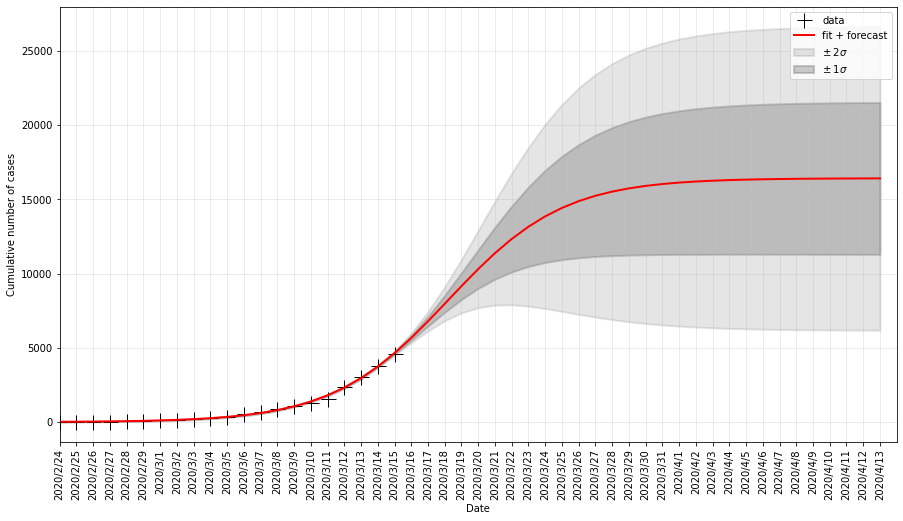

In [78]:
# TODO:  Figure out a nicer way to do this.
x_date_labels = pd.date_range(
    start=df.loc[:, ['Date', COUNTRY]].dropna().iloc[0].loc['Date'], 
    periods=x_vals.shape[0]
).to_series()\
.apply(
    lambda x: '%i/%i/%i' % (x.year, x.month, x.day)
)

model.plot(x_date_labels)

In [62]:
# next prediction
model._pred_y[series_to_fit.shape[0]]

24177.724269897295

In [63]:
# saturation point
model._pred_y[-1]

60760.62485746618

# Model behavior
- This cell just produces the model behavior if one of the three parameters is varied

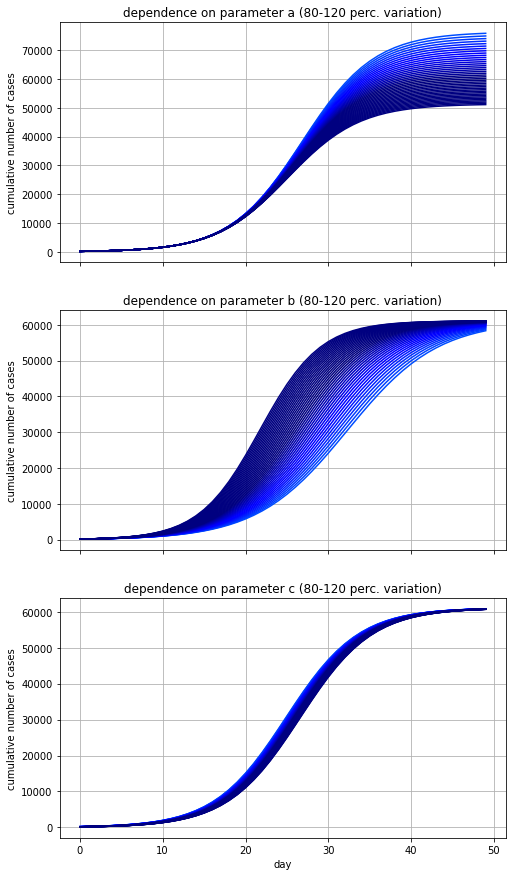

In [68]:
p = model._fit_params

fig, ax = plt.subplots(
    nrows=3, 
    ncols=1, 
    sharex=True, 
    figsize=(8, 15)
)
for c in np.arange(0.8, 1.2, 0.01):
    color = plt.cm.jet(1-c)
    ax[0].plot(
        x_vals, 
        model.model(x_vals, c*p[0], p[1], p[2]), 
        c=color
    )
    ax[1].plot(
        x_vals, 
        model.model(x_vals, p[0], c*p[1], p[2]), 
        c=color
    )
    ax[2].plot(
        x_vals, 
        model.model(x_vals, p[0], p[1], c*p[2]), 
        c=color
    )

    for a, param in zip(ax, ['a', 'b', 'c']): 
        a.set_title('dependence on parameter %s (80-120 perc. variation)' %param)
        a.set_ylabel('cumulative number of cases')
        a.grid(True)
    ax[2].set_xlabel('day')

plt.show()